In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_original=pd.read_excel("Raw_data.xlsx",sheet_name='CustomerAddress')

In [7]:
data_original.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [8]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [9]:
data_original.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [10]:
data_original['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [25]:
data_original['state'].replace({"New South Wales":"NSW","Victoria":"VIC"},inplace=True)

In [26]:
data_original['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [27]:
data_original['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [28]:
data_original_country_dedupped = data_original.drop('customer_id', axis=1).drop_duplicates()

In [29]:
print("Number removing customer_id (pk), duplicates : {}".format(data_original_country_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(data_original.shape[0]))

Number removing customer_id (pk), duplicates : 3999
Number of records in original dataset : 3999


In [30]:
data_original.to_csv('CustomerAddress.csv', index=False)

In [32]:
data_original["property_valuation"].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

In [89]:
data_state_pro_val=pd.DataFrame(data_original.groupby("state")["property_valuation"].value_counts())
data_state_pro_val.rename(columns={"property_valuation":"value"},inplace=True)
data_state_pro_val.reset_index(level=("property_valuation"),inplace=True)
data_state_pro_val

,property_valuation,value
state,,
NSW,9,432
NSW,10,411
NSW,8,357
NSW,11,227
NSW,7,190
NSW,12,160
NSW,6,75
NSW,5,71
NSW,4,67


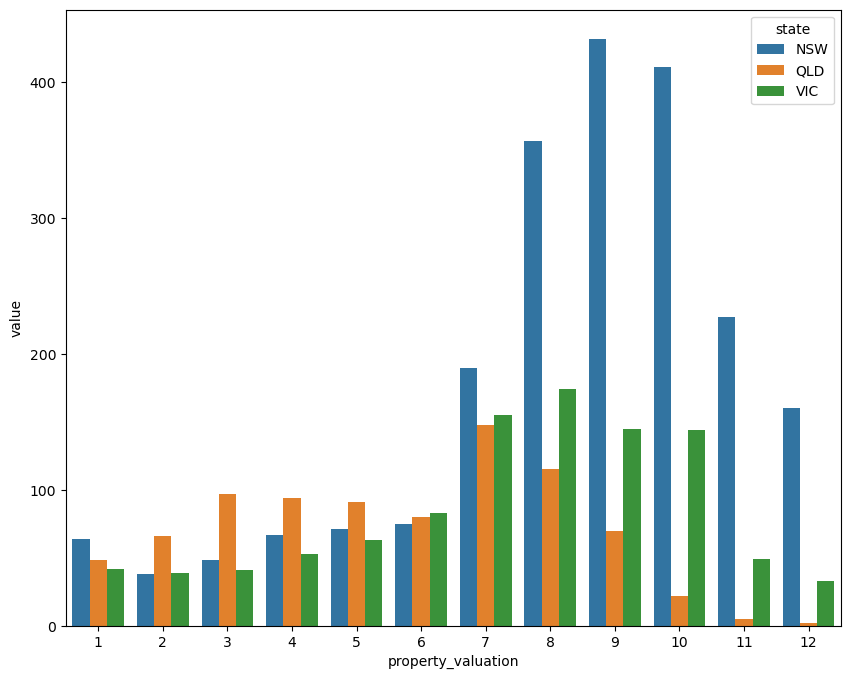

In [92]:
plt.figure(figsize=(10,8))
sns.barplot(x=data_state_pro_val["property_valuation"],y=data_state_pro_val["value"],hue=data_state_pro_val.index)
plt.show()